## EDA on Car Selling Prices data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

In [3]:
%pwd

'c:\\Users\\karth\\ML_practice\\Projects\\EndToEnd_MLOps_Project\\research'

In [4]:
os.chdir("../")

In [5]:
%pwd

'c:\\Users\\karth\\ML_practice\\Projects\\EndToEnd_MLOps_Project'

In [6]:
df = pd.read_csv("artifacts/data_ingestion/Car_Selling_Prices_data.csv")
df.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          4340 non-null   object
 1   year           4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
 7   selling_price  4340 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
df.describe()

,year,km_driven,selling_price
count,4340.000000,4340.000000,4.340000e+03
mean,2013.090783,66215.777419,5.041273e+05
std,4.215344,46644.102194,5.785487e+05
min,1992.000000,1.000000,2.000000e+04
25%,2011.000000,35000.000000,2.087498e+05
50%,2014.000000,60000.000000,3.500000e+05
75%,2016.000000,90000.000000,6.000000e+05
max,2020.000000,806599.000000,8.900000e+06


In [9]:
# seperate Numerical, Categorical columns
num_cols = df.select_dtypes(["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(["object"]).columns.tolist()

print("Numerical columns:-",num_cols)
print("Categorical columns:-",cat_cols)

Numerical columns:- ['year', 'km_driven', 'selling_price']
Categorical columns:- ['brand', 'fuel', 'seller_type', 'transmission', 'owner']


In [10]:
# get uniques of the categorical columns
def get_uniques(df):
    for col in cat_cols:
        n = df[col].nunique()
        uniques = df[col].unique()
        print("column:-",col)
        print("No. of Uniques:-",n)
        print("Uniques:-", uniques)
        print("==================")


get_uniques(df)

column:- brand
No. of Uniques:- 29
Uniques:- ['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']
column:- fuel
No. of Uniques:- 5
Uniques:- ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
column:- seller_type
No. of Uniques:- 3
Uniques:- ['Individual' 'Dealer' 'Trustmark Dealer']
column:- transmission
No. of Uniques:- 2
Uniques:- ['Manual' 'Automatic']
column:- owner
No. of Uniques:- 5
Uniques:- ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


### Feature Engineering

In [11]:
# better to convert "year" to car-"age" for model to understand
current_year = 2025
df["year"] = current_year - df["year"]
df.rename(columns={"year":"age"}, inplace=True)
df.head()

,brand,age,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti,18,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,18,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,13,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun,8,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,11,141000,Diesel,Individual,Manual,Second Owner,450000


In [15]:
print("Old Numerical features:-",num_cols)
# replace the "year" with "age"
num_cols[0] = num_cols[0].replace("year","age")
print("Updated Numerical features:-", num_cols)

Old Numerical features:- ['year', 'km_driven', 'selling_price']
Updated Numerical features:- ['age', 'km_driven', 'selling_price']


### **EDA**

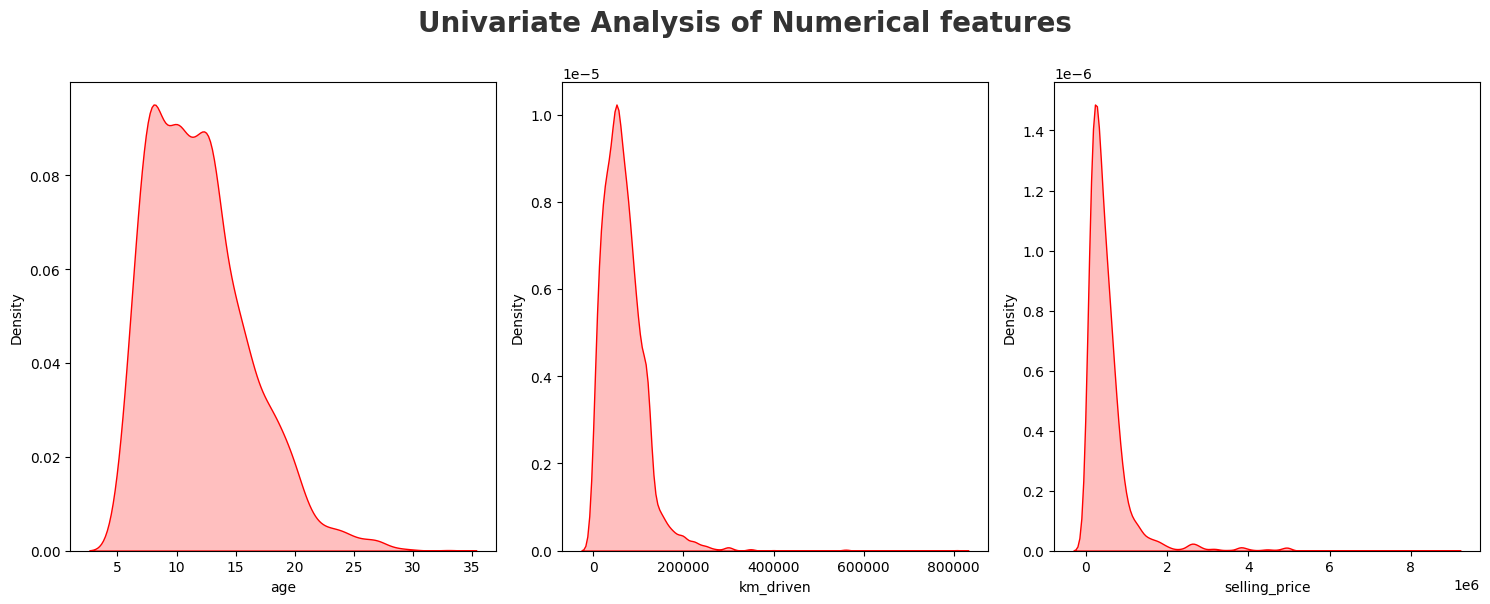

In [20]:
# distributions of data in Numerical columns
plt.figure(figsize=(15,6))
plt.suptitle("Univariate Analysis of Numerical features", fontsize=20, fontweight="bold", alpha=0.8, y=1)

for i in range(0, len(num_cols)):
    plt.subplot(1,3, i+1)
    sns.kdeplot(x=df[num_cols[i]], shade=True, color="r")
    plt.xlabel(num_cols[i])
    plt.tight_layout()

**Observations**:-
- `km_driven`, `selling_price` features are right-skewed.
- `Log transformation` should be applied on the numerical features.

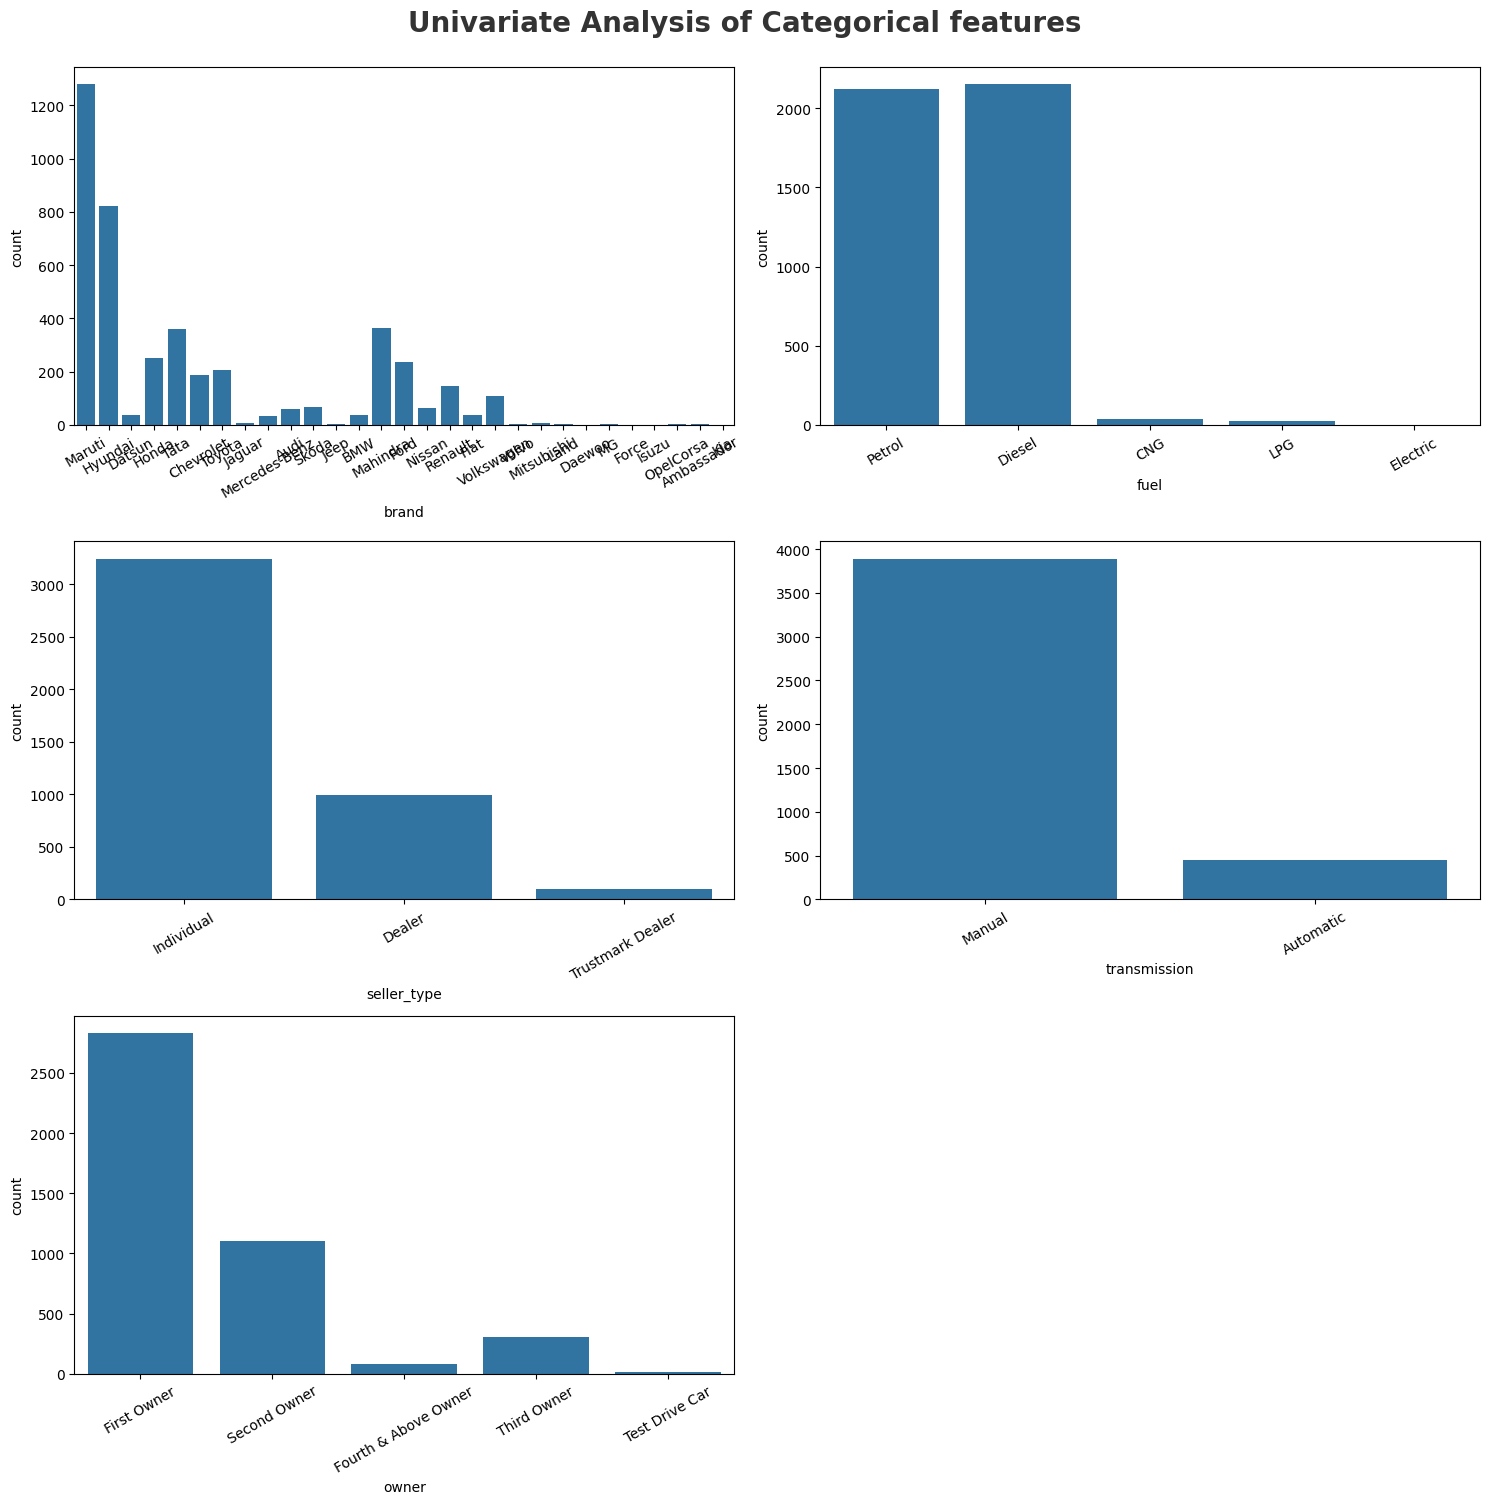

In [36]:
# Prportions of data in Categorical columns
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Categorical features", fontsize=20, fontweight="bold", alpha=0.8, y=1)
category = ['Type','Content Rating']

for i in range(0, len(cat_cols)):
    plt.subplot(3,2, i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.xlabel(cat_cols[i])
    plt.xticks(rotation=30)
    plt.tight_layout()